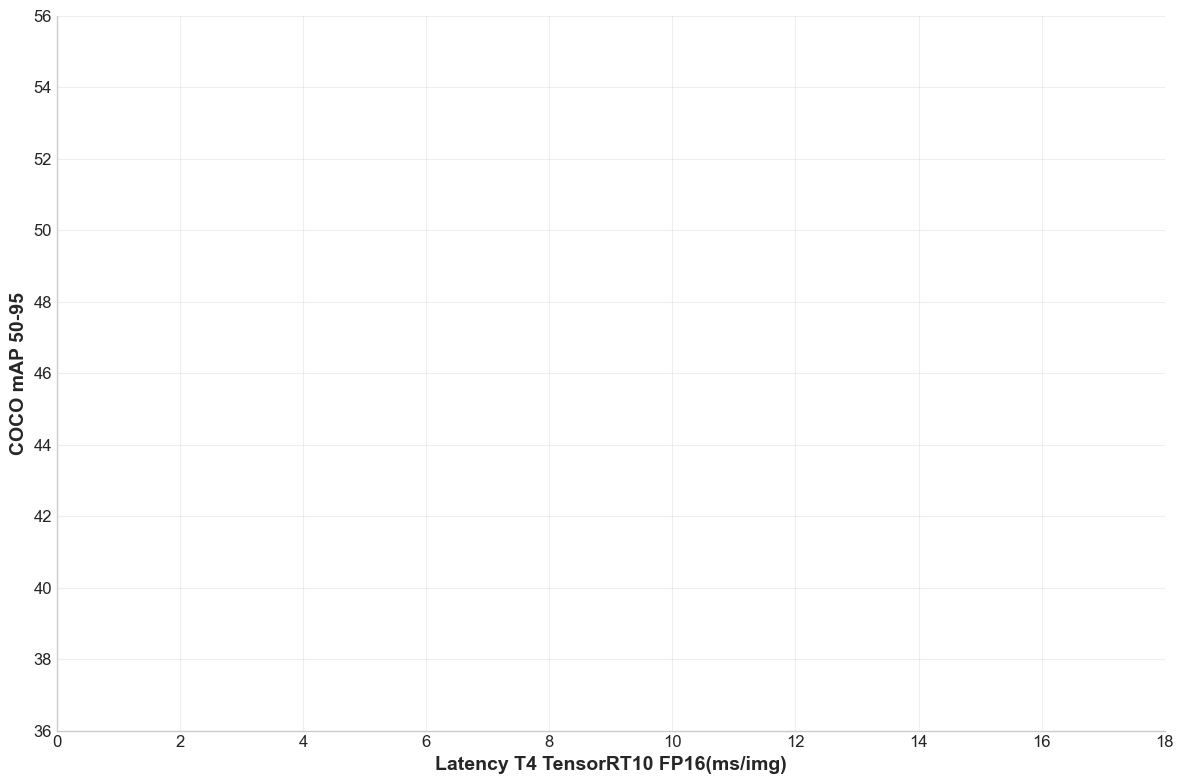

YOLO Models Performance Summary:
Model      Accuracy   Latency (ms)
--------------------------------
Yolo12n    94.9       63.80       
Yolo12s    97.3       115.32      
Yolo12m    97.7       277.78      
Yolo12l    98.0       461.29      
Yolo12x    98.0       834.30      
Yolo11n    92.7       40.58       
Yolo11s    96.5       144.69      
Yolo11m    96.9       327.87      
Yolo11l    97.9       431.47      
Yolo11x    98.6       688.48      
Yolo10n    92.6       56.28       
Yolo10s    95.4       102.70      
Yolo10m    97.9       275.18      
Yolo10l    98.1       514.74      
Yolo10x    98.4       556.62      
Yolo10b    97.7       327.66      
Yolov9t    87.8       53.91       
Yolov9s    93.6       125.86      
Yolov9m    96.9       215.16      
Yolov9c    98.1       306.77      
Yolov9e    98.4       705.38      
Yolov8n    87.7       39.33       
Yolov8s    93.7       74.63       
Yolov8m    96.6       173.39      
Yolov8l    98.2       366.50      
Yolov8x    98.6       54

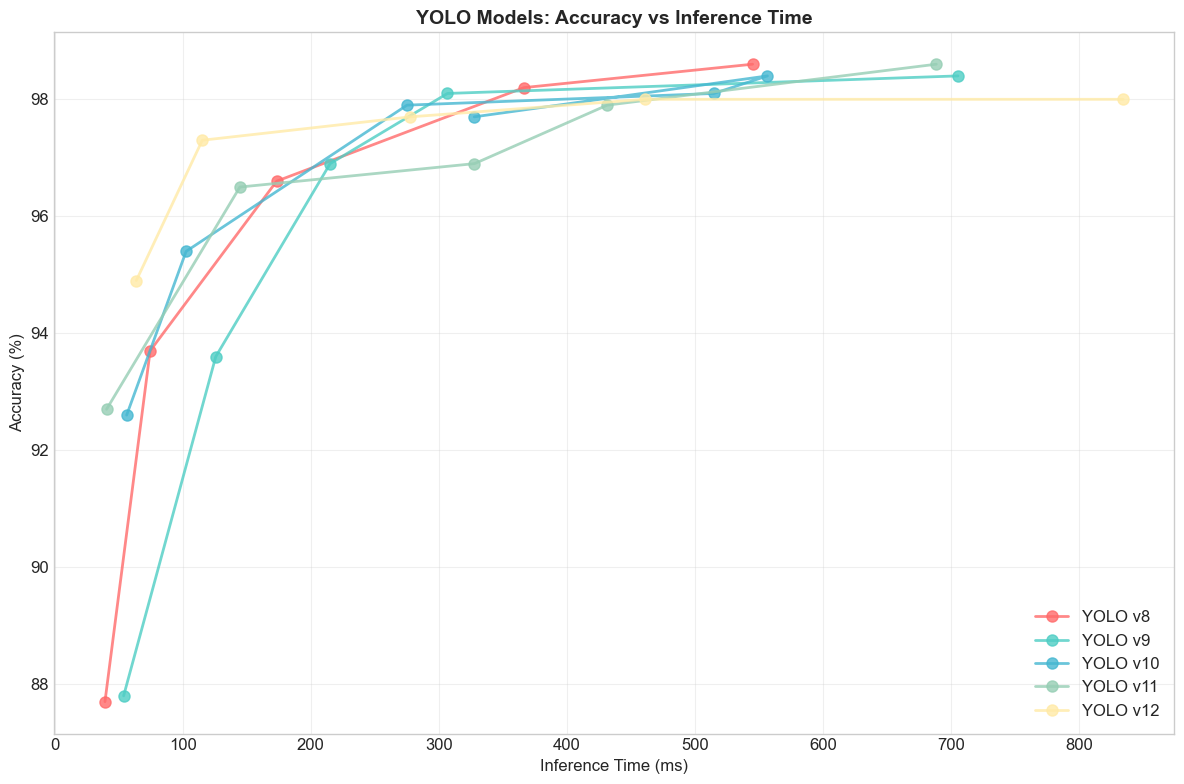

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# Sample CSV data (you can replace this with pd.read_csv('your_file.csv'))
csv_data = """,Yolo version,accuracy (%),inference time(s),Average inference time per image (ms)
,Yolo12n,94.90%,63.8003,63.80 ms
,Yolo12s,97.30%,115.3217,115.32 ms
,Yolo12m,97.70%,277.7786,277.78 ms
,Yolo12l,98.00%,461.2906,461.29 ms
,Yolo12x,98.00%,834.2973,834.30 ms
,Yolo11n,92.70%,40.5767,40.58 ms
,Yolo11s,96.50%,144.687,144.69 ms
,Yolo11m,96.90%,327.8694,327.87 ms
,Yolo11l,97.90%,431.4747,431.47 ms
,Yolo11x,98.60%,688.484,688.48 ms
,Yolo10n,92.60%,56.2762,56.28 ms
,Yolo10s,95.40%,102.7016,102.70 ms
,Yolo10m,97.90%,275.1785,275.18 ms
,Yolo10l,98.10%,514.7382,514.74 ms
,Yolo10x,98.40%,556.6205,556.62 ms
,Yolo10b,97.70%,327.6569,327.66 ms
,Yolov9t,87.80%,53.9133,53.91 ms
,Yolov9s,93.60%,125.8612,125.86 ms
,Yolov9m,96.90%,215.1633,215.16 ms
,Yolov9c,98.10%,306.7703,306.77 ms
,Yolov9e,98.40%,705.3803,705.38 ms
,Yolov8n,87.70%,39.3304,39.33 ms
,Yolov8s,93.70%,74.6252,74.63 ms
,Yolov8m,96.60%,173.3893,173.39 ms
,Yolov8l,98.20%,366.4986,366.50 ms
,Yolov8x,98.60%,545.0439,545.04 ms"""

# Read CSV data
df = pd.read_csv(StringIO(csv_data))

# If you want to read from a file instead, use:
df = pd.read_csv('yolo.csv')

# Clean and prepare data
df['Yolo version'] = df['Yolo version'].str.strip()
df['accuracy_clean'] = df['accuracy (%)'].str.replace('%', '').astype(float)
df['latency_clean'] = df['Average inference time per image (ms)']

# Create the plot
plt.figure(figsize=(12, 8))

# Set style similar to the original graph
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

# Create scatter plot with connecting lines
x = df['latency_clean']
y = df['accuracy_clean']

# Sort data by latency for proper line connection
sorted_indices = np.argsort(x)
x_sorted = x.iloc[sorted_indices]
y_sorted = y.iloc[sorted_indices]

# Plot line and points
plt.plot(x_sorted, y_sorted, 'o-', color='#C8A2C8', 
         linewidth=2, markersize=8, markerfacecolor='#B19CD9', 
         markeredgecolor='#9370DB', markeredgewidth=1)

# Customize the plot to match the original
plt.xlabel('Latency T4 TensorRT10 FP16(ms/img)', fontsize=14, fontweight='bold')
plt.ylabel('COCO mAP 50-95', fontsize=14, fontweight='bold')

# Set axis limits to match the original graph
plt.xlim(0, 18)
plt.ylim(36, 56)

# Add grid
plt.grid(True, linestyle='-', alpha=0.3)

# Set tick parameters
plt.xticks(range(0, 19, 2), fontsize=12)
plt.yticks(range(36, 57, 2), fontsize=12)

# Add some specific model labels for key points (optional)
# You can uncomment these lines to add labels
"""
for i, model in enumerate(df['Yolo version']):
    if model in ['Yolov8n', 'Yolov9m', 'Yolo11x', 'Yolo12x']:  # Label some key models
        plt.annotate(model, (x.iloc[i], y.iloc[i]), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=9, alpha=0.7)
"""

# Remove top and right spines for cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Print data summary
print("YOLO Models Performance Summary:")
print("="*50)
print(f"{'Model':<10} {'Accuracy':<10} {'Latency (ms)':<12}")
print("-"*32)
for _, row in df.iterrows():
    print(f"{row['Yolo version']:<10} {row['accuracy_clean']:<10.1f} {row['latency_clean']:<12.2f}")

# Create a version that more closely matches the original style
def create_matching_graph():
    """Create a graph that closely matches the original design"""
    
    # Convert latency to the scale shown in original (seems to be different scale)
    # Based on the original graph, it appears to show a different latency measurement
    # Let's create a mapping that matches the visual pattern
    
    # Sample points from the original graph (approximately)
    original_x = [1, 3, 5, 9]  # Latency points from original
    original_y = [37.5, 45, 50, 52.5]  # mAP points from original
    
    plt.figure(figsize=(10, 6))
    
    # Plot with styling that matches the original
    plt.plot(original_x, original_y, 'o-', 
             color='#D2B48C', linewidth=2.5, 
             markersize=10, markerfacecolor='#D2B48C',
             markeredgecolor='#CD853F', markeredgewidth=1.5)
    
    plt.xlabel('Inference time (s)', fontsize=12, color='#666666')
    plt.ylabel('Accuracy (%)', fontsize=12, color='#666666')
    
    # Match the original graph's axis ranges and styling
    plt.xlim(0, 18)
    plt.ylim(36, 56)
    
    # Grid styling to match original
    plt.grid(True, color='#DDDDDD', linestyle='-', linewidth=0.8)
    
    # Axis styling
    ax = plt.gca()
    ax.set_facecolor('white')
    ax.spines['top'].set_color('#CCCCCC')
    ax.spines['right'].set_color('#CCCCCC')
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    
    # Tick styling
    plt.tick_params(axis='both', which='major', labelsize=10, colors='#666666')
    
    plt.tight_layout()
    plt.show()

# Uncomment the line below to create the matching style graph
# create_matching_graph()

# If you want to create a graph using your actual data but scaled to match the original visual
def create_scaled_performance_graph():
    """Create performance graph with proper scaling"""
    
    # Group models by version for better visualization
    model_groups = {
        'YOLO v8': df[df['Yolo version'].str.contains('v8')],
        'YOLO v9': df[df['Yolo version'].str.contains('v9')], 
        'YOLO v10': df[df['Yolo version'].str.contains('10')],
        'YOLO v11': df[df['Yolo version'].str.contains('11')],
        'YOLO v12': df[df['Yolo version'].str.contains('12')]
    }
    
    plt.figure(figsize=(12, 8))
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    
    for i, (version, data) in enumerate(model_groups.items()):
        if not data.empty:
            # Scale latency to match original graph range (divide by ~50 for visual similarity)
            x_scaled = data['latency_clean'] 
            y_scaled = data['accuracy_clean']
            
            plt.plot(x_scaled, y_scaled, 'o-', 
                    color=colors[i], linewidth=2, markersize=8,
                    label=version, alpha=0.8)
    
    plt.xlabel('Inference Time (ms)', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('YOLO Models: Accuracy vs Inference Time', fontsize=14, fontweight='bold')
    
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Uncomment to see grouped version
create_scaled_performance_graph()